# Red de empresas - Patrones adjudicación
__Queletzú Paulina Aspra Polo y Mariana Esther Martínez Sánchez__

1. Limpieza por sexenio
* Colaboraciones en contratos
* __Patrones adjudicación__
* Contratos de publicidad 


* ¿Cuántos contratos y de que monto se dieron por cada tipo de adjudicación?
    * Sexenio y Año
    * Absoluto y normalizado
* ¿Cuántas empresas contrata cada institucion? dist
* ¿Qué monto asigna por tipo de contrato cada institucion? barra
* ¿Para cuántas instituciones trabaja una empresa? dist
* ¿Qué monto recibe por tipo de adjudicación una empresa? barra
* ¿Qué empresas reciben un solo gran contrato? barra
* Lista puede con todas
* Lista favoritas
* ¿Son las mismas empresas populares a lo largo del tiempo? Venn
    * Todas
    * Puede con todas
    * Las favoritas


## Cargar datos

In [1]:
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib_venn
import seaborn as sns

In [2]:
sexenios = ['FOX','CAL','EPN']
colors_sex = {'FOX':'red','CAL':'green','EPN':'blue'}
colors_met = {'direct':'#e7298a','limited':'#a6761d','open':'#8da0cb'}
thr_select = 500

In [3]:
data = {}
for pres in sexenios:
    print(pres)
    data[pres] = {}
    data[pres]['contratos'] = pd.read_csv('data-clean/{}-contratos.csv'.format(pres))
    print('\tcontratos', data[pres]['contratos'].shape)
    data[pres]['red'] = pd.read_csv('data-clean/{}-red.csv'.format(pres))
    print('\tred', data[pres]['red'].shape)

FOX
	contratos (138462, 12)
	red (74557, 13)
CAL
	contratos (549162, 12)
	red (122254, 13)
EPN
	contratos (452369, 12)
	red (172559, 13)


## ¿Cuántos contratos y de que monto se dieron por cada tipo de adjudicación?

* Sexenio y Año
* Absoluto y normalizado

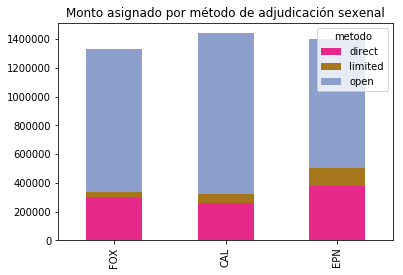

In [4]:
df = [data[pres]['contratos'].groupby(['metodo']).agg({'monto':'sum'}) \
      .rename(columns={'monto':pres}) for pres in sexenios]

df = pd.concat(df, sort=False, axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index],
                        title="Monto asignado por método de adjudicación sexenal")
plt.show()

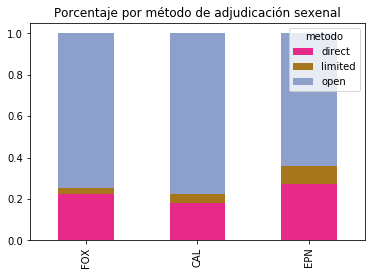

In [5]:
df = df.divide(df.sum(), axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index], 
                        title="Porcentaje por método de adjudicación sexenal")
plt.show()

In [6]:
df = [pd.pivot_table(data[pres]['contratos'], values='monto', index=['metodo'], columns=['fecha'], aggfunc='sum') \
      .rename(columns={'monto':pres}) for pres in sexenios]

df = pd.concat(df, sort=False, axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index],
                        title="Monto asignado por método de adjudicación anual")
plt.show()

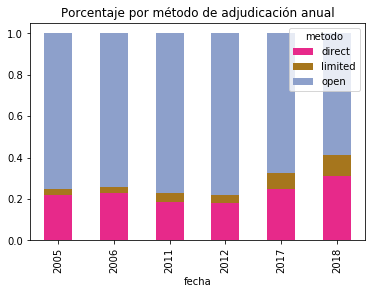

In [7]:
df = df.divide(df.sum(), axis=1)
df.transpose().plot.bar(stacked=True, color=[colors_met[c] for c in df.index], 
                        title="Porcentaje por método de adjudicación anual")
plt.show()

## ¿Qué monto asigna por tipo de contrato cada institucion?

In [8]:
inst = {key:data[key]['contratos'] \
                .groupby('nombre').agg({'monto':'sum','directa':'sum','invtres':'sum','abierta':'sum'}) \
                .sort_values('monto', ascending=False)
        for key in sexenios}
print([ [key,df.shape[0]] for key, df in inst.items() ])

[['FOX', 2660], ['CAL', 4295], ['EPN', 4470]]


FOX


CAL


EPN


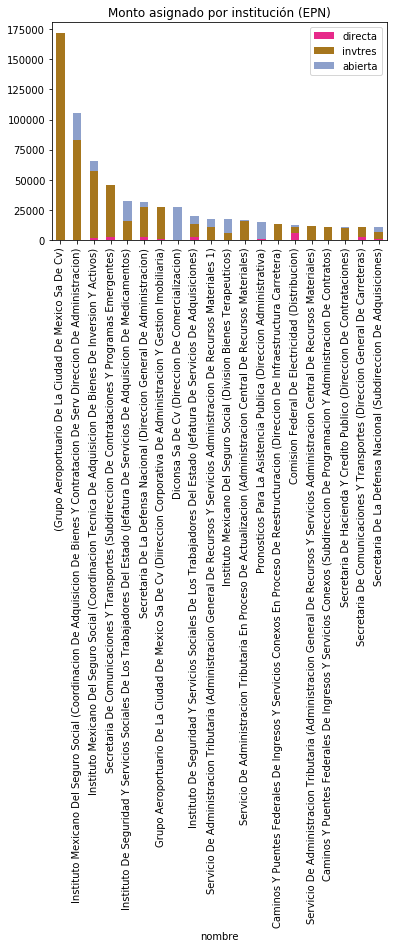

In [9]:
for key, df in inst.items():
    print(key)
    df.sort_values('monto', ascending=False).drop('monto',axis=1).head(20)\
           .plot.bar(stacked=True, color=['#e7298a','#a6761d','#8da0cb'],
                     title="Monto asignado por institución ({})".format(key))
    plt.show()

## ¿Cuántas empresas contrata cada institucion?

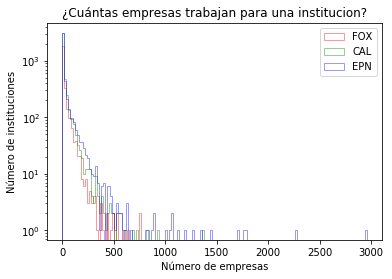

In [10]:
for key, df in inst.items():
    d = data[key]['red'].groupby('nombre').agg( {'empresa':'count', 'c_num':'sum' }) \
                         .rename(columns={'nombre':key}) \
                         .sort_values('c_num', ascending=False)
    d = d['empresa'].to_list()
    sns.distplot(d, kde=False, 
                 bins=round(max(d)/20), label=key, 
                 hist_kws={"histtype":"step", "color":colors_sex[key]}
                )
plt.title("¿Cuántas empresas trabajan para una institucion?")
plt.xlabel("Número de empresas")
plt.ylabel("Número de instituciones")
plt.yscale('log')
plt.legend()
plt.show()

## ¿Qué monto recibe por tipo de adjudicación una empresa? 

In [11]:
empr = {key:data[key]['contratos'] \
                .groupby('empresa').agg({'monto':'sum','directa':'sum','invtres':'sum','abierta':'sum'}) \
                .sort_values('monto', ascending=False)
        for key in sexenios}
print([ [key,df.shape[0]] for key, df in inst.items() ])

[['FOX', 2660], ['CAL', 4295], ['EPN', 4470]]


FOX


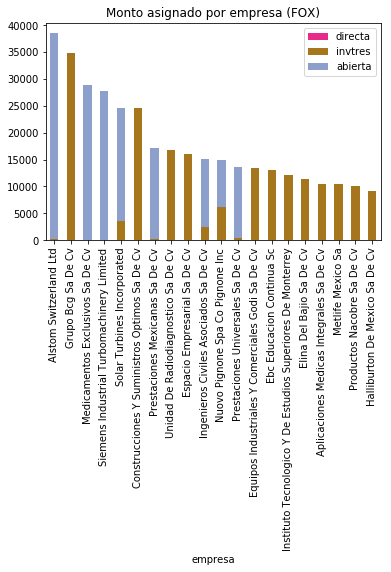

CAL


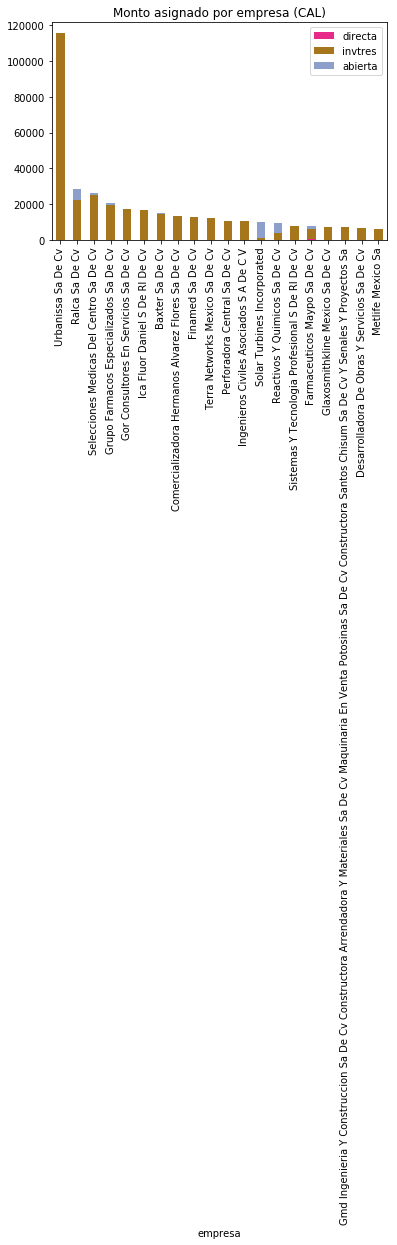

EPN


In [12]:
for key, df in empr.items():
    print(key)
    df.sort_values('monto', ascending=False).drop('monto',axis=1).head(20)\
           .plot.bar(stacked=True, color=['#e7298a','#a6761d','#8da0cb'],
                     title="Monto asignado por empresa ({})".format(key))
    plt.show()

## ¿Para cuántas instituciones trabaja una empresa?

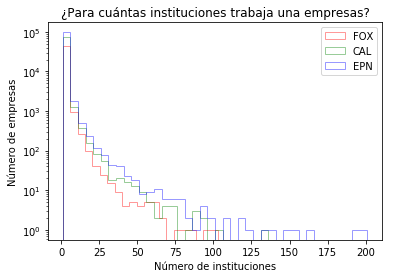

In [13]:
for key, df in inst.items():
    d = data[key]['red'].groupby('empresa').agg( {'nombre':'count', 'c_num':'sum' }) \
                         .rename(columns={'empresa':key}) \
                         .sort_values('c_num', ascending=False)
    d = d['nombre'].to_list()
    sns.distplot(d, kde=False, 
                 bins=round(max(d)/5), label=key, hist_kws={"histtype":"step", "color":colors_sex[key]})
plt.title("¿Para cuántas instituciones trabaja una empresas?")
plt.xlabel("Número de instituciones")
plt.ylabel("Número de empresas")
plt.yscale('log')
plt.legend()
plt.show()

## ¿Qué empresas reciben un solo gran contrato?

FOX


CAL


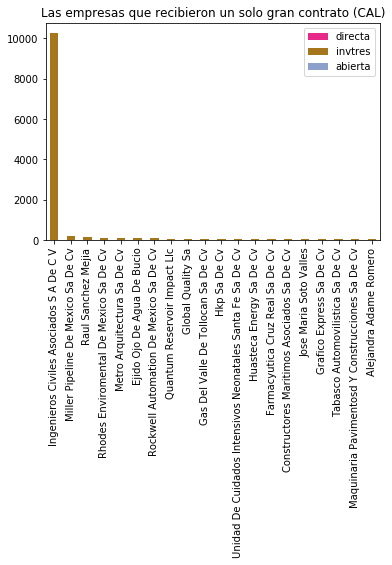

EPN


In [14]:
for key, df in empr.items():
    print(key)
    singleton = data[key]['contratos']['empresa'].value_counts()
    singleton = singleton[singleton==1].index
    singleton = empr[key].loc[singleton,:].sort_values('monto', ascending=False)
    singleton.drop('monto',axis=1).head(20)\
             .plot.bar(stacked=True, color=['#e7298a','#a6761d','#8da0cb'],
                       title="Las empresas que recibieron un solo gran contrato ({})".format(key))
    plt.show()

## Las favoritas

trabajaron para una o dos instituciones
menos del 25% de el monto recibido es por licitacion abierta



In [15]:
for key in sexenios:
    empresas = data[key]['contratos'].groupby('empresa') \
                    .agg({'fecha':'count','nombre':lambda x: x.nunique(),
                    'monto':'sum','abierta':'sum','invtres':'sum','directa':'sum'})
    empresas = empresas[empresas['fecha']>1]
    empresas.columns = ['n_contratos','n_instituciones','monto_total','%_abierta','%_invtres','%_directa']
    for col in ['%_abierta','%_invtres','%_directa']:
        empresas[col] = round(empresas[col] *100 / empresas['monto_total'],3)
    data[key]['empresas'] = empresas

In [16]:
thr_favoritas_institu = 2
thr_favoritas_abierto = 0.25

venn = {}

for key in sexenios:
    print(key)
    favoritas = data[key]['empresas']
    favoritas = favoritas[(favoritas['n_instituciones']<=thr_favoritas_institu) 
                          & (favoritas['%_abierta']<=thr_favoritas_abierto)] \
                          .sort_values('monto_total', ascending=False)
    n,t = favoritas.shape[0], data[key]['empresas'].shape[0]
    print('\tFavoritas {} de {} empresas ({}%)'.format(n,t,round(n*100/t)))
    n,t = round(favoritas['monto_total'].sum()), round(data[key]['contratos']['monto'].sum())
    print('\tMonto {} de {} en el sexenio ({}%)'.format(n,t,round(n*100/t)))
    favoritas.to_csv('data-clean/{}-favoritas.csv'.format(key))
    venn[key] = set(favoritas.index.to_list())
    display(favoritas.head(15))

FOX
	Favoritas 7404 de 21581 empresas (34%)
	Monto 289192.0 de 1334674.0 en el sexenio (22.0%)


n_contratos  \
empresa                                                           
Espacio Empresarial Sa De Cv                                  6   
Equipos Industriales Y Comerciales Godi Sa De Cv              3   
Ebc Educacion Continua Sc                                     3   
Currie Brown Mexico S A De C V                                2   
Inercial Grupo Constructor Sa De Cv                           9   
Ignacio Nava Aguilar                                          4   
Caliserv Sa De Cv                                             6   
Interconecta Sa De Cv                                         4   
Creaser Sc                                                    2   
Benton Y Asociados Sa                                         3   
Grupo Kualamex Sa De Cv                                       3   
Despac Sa De Cv                                              15   
Cpi Ingenieria Y Administracion De Proyectos Sa...            8   
Realizacion Arquitectonica Y Urbanistica Sa De Cv             9   
Ted Tecnologia Editorial Sa De Cv                             2   

                                                    n_instituciones  \
empresa                                                               
Espacio Empresarial Sa De Cv                                      2   
Equipos Industriales Y Comerciales Godi Sa De Cv                  2   
Ebc Educacion Continua Sc                                         2   
Currie Brown Mexico S A De C V                                    1   
Inercial Grupo Constructor Sa De Cv                               1   
Ignacio Nava Aguilar                                              2   
Caliserv Sa De Cv                                                 2   
Interconecta Sa De Cv                                             2   
Creaser Sc                                                        1   
Benton Y Asociados Sa                                             1   
Grupo Kualamex Sa De Cv                                           2   
Despac Sa De Cv                                                   1   
Cpi Ingenieria Y Administracion De Proyectos Sa...                1   
Realizacion Arquitectonica Y Urbanistica Sa De Cv                 2   
Ted Tecnologia Editorial Sa De Cv                                 1   

                                                    monto_total  %_abierta  \
empresa                                                                      
Espacio Empresarial Sa De Cv                          16075.817      0.007   
Equipos Industriales Y Comerciales Godi Sa De Cv      13511.374      0.000   
Ebc Educacion Continua Sc                             12976.881      0.004   
Currie Brown Mexico S A De C V                         6298.268      0.000   
Inercial Grupo Constructor Sa De Cv                    6076.321      0.002   
Ignacio Nava Aguilar                                   4849.276      0.000   
Caliserv Sa De Cv                                      4727.608      0.013   
Interconecta Sa De Cv                                  4518.503      0.000   
Creaser Sc                                             4218.250      0.000   
Benton Y Asociados Sa                                  4195.698      0.000   
Grupo Kualamex Sa De Cv                                4189.584      0.000   
Despac Sa De Cv                                        4166.283      0.000   
Cpi Ingenieria Y Administracion De Proyectos Sa...     4165.090      0.121   
Realizacion Arquitectonica Y Urbanistica Sa De Cv      3885.083      0.056   
Ted Tecnologia Editorial Sa De Cv                      3682.919      0.000   

                                                    %_invtres  %_directa  
empresa                                                                   
Espacio Empresarial Sa De Cv                           99.993      0.000  
Equipos Industriales Y Comerciales Godi Sa De Cv       99.981      0.019  
Ebc Educacion Continua Sc                              99.996      0.000  
Cu

CAL
	Favoritas 18858 de 75729 empresas (25%)
	Monto 620893.0 de 1453994.0 en el sexenio (43.0%)


n_contratos  \
empresa                                                           
Urbanissa Sa De Cv                                            2   
Gor Consultores En Servicios Sa De Cv                         2   
Ica Fluor Daniel S De Rl De Cv                                4   
Comercializadora Hermanos Alvarez Flores Sa De Cv             2   
Finamed Sa De Cv                                              2   
Perforadora Central Sa De Cv                                  2   
Sistemas Y Tecnologia Profesional S De Rl De Cv               2   
Gmd Ingenieria Y Construccion Sa De Cv Construc...            2   
Desarrolladora De Obras Y Servicios Sa De Cv                  2   
Gmd Ingenieria Y Construccion Sa De Cv                        2   
Intermet Sa De Cv                                             2   
Sumitomo Corporation Europe Plc                               4   
Dowell Schlumberger De Mexico Sadecv                          4   
Weatherford De Mexico Sa De Cv                                2   
Servicios Integrales Gsm S De Rl De Cv Operador...            2   

                                                    n_instituciones  \
empresa                                                               
Urbanissa Sa De Cv                                                1   
Gor Consultores En Servicios Sa De Cv                             1   
Ica Fluor Daniel S De Rl De Cv                                    2   
Comercializadora Hermanos Alvarez Flores Sa De Cv                 1   
Finamed Sa De Cv                                                  1   
Perforadora Central Sa De Cv                                      1   
Sistemas Y Tecnologia Profesional S De Rl De Cv                   1   
Gmd Ingenieria Y Construccion Sa De Cv Construc...                1   
Desarrolladora De Obras Y Servicios Sa De Cv                      1   
Gmd Ingenieria Y Construccion Sa De Cv                            1   
Intermet Sa De Cv                                                 1   
Sumitomo Corporation Europe Plc                                   1   
Dowell Schlumberger De Mexico Sadecv                              2   
Weatherford De Mexico Sa De Cv                                    1   
Servicios Integrales Gsm S De Rl De Cv Operador...                1   

                                                    monto_total  %_abierta  \
empresa                                                                      
Urbanissa Sa De Cv                                   115970.422        0.0   
Gor Consultores En Servicios Sa De Cv                 17009.144        0.0   
Ica Fluor Daniel S De Rl De Cv                        16813.584        0.0   
Comercializadora Hermanos Alvarez Flores Sa De Cv     12983.488        0.0   
Finamed Sa De Cv                                      12762.670        0.0   
Perforadora Central Sa De Cv                          10445.566        0.0   
Sistemas Y Tecnologia Profesional S De Rl De Cv        7875.416        0.0   
Gmd Ingenieria Y Construccion Sa De Cv Construc...     6933.944        0.0   
Desarrolladora De Obras Y Servicios Sa De Cv           6714.112        0.0   
Gmd Ingenieria Y Construccion Sa De Cv                 5977.538        0.0   
Intermet Sa De Cv                                      5809.844        0.0   
Sumitomo Corporation Europe Plc                        4491.630        0.0   
Dowell Schlumberger De Mexico Sadecv                   4260.378        0.0   
Weatherford De Mexico Sa De Cv                         4124.202        0.0   
Servicios Integrales Gsm S De Rl De Cv Operador...     3646.596        0.0   

                                                    %_invtres  %_directa  
empresa                                                                   
Urbanissa Sa De Cv                                      100.0        0.0  
Gor Consultores En Servicios Sa De Cv                   100.0        0.0  
Ica Fluor Daniel S De Rl De Cv                          100.0        0.0  
Co

EPN
	Favoritas 5990 de 50853 empresas (12%)
	Monto 189042.0 de 1403777.0 en el sexenio (13.0%)


n_contratos  \
empresa                                                           
Grupo Constructor Marhnos Sa De Cv                            2   
Centro De Diagnostico Angeles Sa De Cv                        2   
Ica Constructora De Infraestructura Sa De Cv                  2   
Infralux Sa De Cv                                             3   
Logem Operadora Mexicana De Asistencia Universa...            2   
Foncar S A De C V                                             4   
Grupo Constructor De La Peninsula Ht Sa De Cv                 3   
Servicios Integrados Trujillo Romano Sa De Cv                 2   
Aerocross S A De C V                                          5   
Jpiusa Sa De Cv En Participacon Conjunta Con In...            2   
Construcciones E Inmobiliarias Canaro Sa De Cv                4   
Hewlett Packard Mexico S De Rl De Cv                          3   
Bconnect Services Sa De Cv                                    2   
Baserhit Asociados Sa De Cv                                  15   
Calzada Construcciones Sa De Cv                               3   

                                                    n_instituciones  \
empresa                                                               
Grupo Constructor Marhnos Sa De Cv                                1   
Centro De Diagnostico Angeles Sa De Cv                            1   
Ica Constructora De Infraestructura Sa De Cv                      1   
Infralux Sa De Cv                                                 2   
Logem Operadora Mexicana De Asistencia Universa...                1   
Foncar S A De C V                                                 1   
Grupo Constructor De La Peninsula Ht Sa De Cv                     2   
Servicios Integrados Trujillo Romano Sa De Cv                     2   
Aerocross S A De C V                                              1   
Jpiusa Sa De Cv En Participacon Conjunta Con In...                1   
Construcciones E Inmobiliarias Canaro Sa De Cv                    1   
Hewlett Packard Mexico S De Rl De Cv                              2   
Bconnect Services Sa De Cv                                        2   
Baserhit Asociados Sa De Cv                                       2   
Calzada Construcciones Sa De Cv                                   2   

                                                    monto_total  %_abierta  \
empresa                                                                      
Grupo Constructor Marhnos Sa De Cv                    28008.476      0.000   
Centro De Diagnostico Angeles Sa De Cv                16856.756      0.000   
Ica Constructora De Infraestructura Sa De Cv           9085.276      0.000   
Infralux Sa De Cv                                      7771.213      0.000   
Logem Operadora Mexicana De Asistencia Universa...     3868.522      0.000   
Foncar S A De C V                                      3056.681      0.000   
Grupo Constructor De La Peninsula Ht Sa De Cv          2301.972      0.000   
Servicios Integrados Trujillo Romano Sa De Cv          2172.867      0.004   
Aerocross S A De C V                                   2078.008      0.000   
Jpiusa Sa De Cv En Participacon Conjunta Con In...     1805.837      0.000   
Construcciones E Inmobiliarias Canaro Sa De Cv         1711.993      0.000   
Hewlett Packard Mexico S De Rl De Cv                   1657.918      0.094   
Bconnect Services Sa De Cv                             1513.606      0.000   
Baserhit Asociados Sa De Cv                            1477.661      0.058   
Calzada Construcciones Sa De Cv                        1314.418      0.000   

                                                    %_invtres  %_directa  
empresa                                                                   
Grupo Constructor Marhnos Sa De Cv                    100.000      0.000  
Centro De Diagnostico Angeles Sa De Cv                100.000      0.000  
Ica Constructora De Infraestructura Sa De Cv          100.000      0.000  
In

In [17]:
matplotlib_venn.venn3( venn.values(), set_labels=venn.keys())
plt.show()

## Las puede con todas
* Lista y barras

In [18]:
for key in sexenios:
    print(key)
    pct = data[key]['empresas']
    pct = pct[ pct['n_instituciones']>=pct['n_instituciones'].quantile(0.99) ]
    pct = pct.sort_values('n_instituciones', ascending=False)
    n,t = pct.shape[0], data[key]['empresas'].shape[0]
    print('\tFavoritas {} de {} empresas ({}%)'.format(n,t,round(n*100/t)))
    n,t = round(pct['monto_total'].sum()), round(data[key]['contratos']['monto'].sum())
    print('\tMonto {} de {} en el sexenio ({}%)'.format(n,t,round(n*100/t)))
    pct.to_csv('data-clean/{}-puedecontodas.csv'.format(key))
    venn[key] = set(pct.index.to_list())
    display(pct.head(15))

FOX
	Favoritas 218 de 21581 empresas (1%)
	Monto 205917.0 de 1334674.0 en el sexenio (15.0%)


n_contratos  n_instituciones  \
empresa                                                             
Efectivalesa De Cv                           181              103   
Seguros Comercial America Sa De Cv           157               94   
Telefonos De Mexico Sa De Cv                 306               85   
Infra Sa De Cv                               172               82   
Farmacos Especializados Sa De Cv             557               78   
Cicovisa Sa De Cv                            138               65   
Oracle De Mexico Sa De Cv                    162               65   
Efectivales Sa De Cv                         143               63   
Bodega De Llantas La Viga Sa De Cv            98               61   
Xerox Mexicana Sa De Cv                      119               61   
Sistemas Contino Sa De Cv                     96               61   
Prestaciones Mexicanas Sa De Cv              152               60   
Baxtersa De Cv                               159               59   
Siemens S A De C V                           146               58   
Productos Metalicos Steele Sa De Cv           92               58   

                                     monto_total  %_abierta  %_invtres  \
empresa                                                                  
Efectivalesa De Cv                      1607.889      0.000    100.000   
Seguros Comercial America Sa De Cv      1577.847      1.238     98.762   
Telefonos De Mexico Sa De Cv            2510.176     40.766     59.171   
Infra Sa De Cv                           583.437      3.960     94.816   
Farmacos Especializados Sa De Cv        7332.674      5.620     93.867   
Cicovisa Sa De Cv                        241.709      5.378     75.813   
Oracle De Mexico Sa De Cv               1915.622     17.590     82.381   
Efectivales Sa De Cv                     726.870     51.168     42.594   
Bodega De Llantas La Viga Sa De Cv        34.100      7.792     76.915   
Xerox Mexicana Sa De Cv                  391.600      7.243     92.418   
Sistemas Contino Sa De Cv                192.165      0.796     93.464   
Prestaciones Mexicanas Sa De Cv        17147.018     98.781      1.092   
Baxtersa De Cv                          4548.093      0.000    100.000   
Siemens S A De C V                       504.150     19.463     79.762   
Productos Metalicos Steele Sa De Cv      429.146      2.133     90.756   

                                     %_directa  
empresa                                         
Efectivalesa De Cv                       0.000  
Seguros Comercial America Sa De Cv       0.000  
Telefonos De Mexico Sa De Cv             0.063  
Infra Sa De Cv                           1.224  
Farmacos Especializados Sa De Cv         0.506  
Cicovisa Sa De Cv                       18.809  
Oracle De Mexico Sa De Cv                0.029  
Efectivales Sa De Cv                     6.238  
Bodega De Llantas La Viga Sa De Cv      15.293  
Xerox Mexicana Sa De Cv                  0.339  
Sistemas Contino Sa De Cv                5.740  
Prestaciones Mexicanas Sa De Cv          0.127  
Baxtersa De Cv                           0.000  
Siemens S A De C V                       0.775  
Productos Metalicos Steele Sa De Cv      7.111

CAL
	Favoritas 867 de 75729 empresas (1%)
	Monto 293296.0 de 1453994.0 en el sexenio (20.0%)


n_contratos  \
empresa                                                           
Infra Sa De Cv                                              525   
Telefonos De Mexico Sab De Cv                               650   
Praxair Mexico S De Rl De Cv                                440   
Efectivale Sa De Cv                                         336   
Efectivale S De Rl De Cv                                    286   
Bodega De Llantas La Viga Sa De Cv                          208   
Farmaceuticos Maypo Sa De Cv                               1072   
Equipos Electricos Para Alta Tension Sa De Cv               526   
Estafeta Mexicana Sa De Cv                                  290   
Radiomovil Dipsa Sa De Cv                                   253   
Sodexo Motivation Solutions Mexico Sa De Cv                 236   
Oracle De Mexico Sa De Cv                                   206   
Accor Servicios Empresariales Sa De Cv                      194   
El Universal Compania Periodistica Nacional Sa ...          334   
Laboratorios Pisa Sa De Cv                                 1090   

                                                    n_instituciones  \
empresa                                                               
Infra Sa De Cv                                                  136   
Telefonos De Mexico Sab De Cv                                   102   
Praxair Mexico S De Rl De Cv                                     93   
Efectivale Sa De Cv                                              92   
Efectivale S De Rl De Cv                                         90   
Bodega De Llantas La Viga Sa De Cv                               89   
Farmaceuticos Maypo Sa De Cv                                     88   
Equipos Electricos Para Alta Tension Sa De Cv                    81   
Estafeta Mexicana Sa De Cv                                       74   
Radiomovil Dipsa Sa De Cv                                        73   
Sodexo Motivation Solutions Mexico Sa De Cv                      71   
Oracle De Mexico Sa De Cv                                        71   
Accor Servicios Empresariales Sa De Cv                           69   
El Universal Compania Periodistica Nacional Sa ...               68   
Laboratorios Pisa Sa De Cv                                       66   

                                                    monto_total  %_abierta  \
empresa                                                                      
Infra Sa De Cv                                         2235.862     34.867   
Telefonos De Mexico Sab De Cv                          2014.542     89.972   
Praxair Mexico S De Rl De Cv                            724.392     56.415   
Efectivale Sa De Cv                                     708.460     32.842   
Efectivale S De Rl De Cv                                627.158     22.709   
Bodega De Llantas La Viga Sa De Cv                      279.214      4.381   
Farmaceuticos Maypo Sa De Cv                           7493.034     21.162   
Equipos Electricos Para Alta Tension Sa De Cv           145.570     27.602   
Estafeta Mexicana Sa De Cv                               76.964     39.847   
Radiomovil Dipsa Sa De Cv                               467.774     50.798   
Sodexo Motivation Solutions Mexico Sa De Cv            2659.352     62.043   
Oracle De Mexico Sa De Cv                               603.584     90.764   
Accor Servicios Empresariales Sa De Cv                 1378.085     12.950   
El Universal Compania Periodistica Nacional Sa ...       93.264     68.209   
Laboratorios Pisa Sa De Cv                             1464.542     47.283   

                                                    %_invtres  %_directa  
empresa                                                                   
Infra Sa De Cv                                         64.422      0.682  
Telefonos De Mexico Sab De Cv                           8.996      0.109  
Praxair Mexico S De Rl De Cv                           41.307      1.911  
Ef

EPN
	Favoritas 554 de 50853 empresas (1%)
	Monto 263334.0 de 1403777.0 en el sexenio (19.0%)


n_contratos  n_instituciones  \
empresa                                                                     
Edenred Mexico Sa De Cv                              422              201   
Efectivale S De Rl De Cv                             403              194   
Infra Sa De Cv                                       885              162   
Electropura                                          237              151   
Estafeta Mexicana Sa De Cv                           257              149   
Farmaceuticos Maypo Sa De Cv                        1634              137   
Si Vale Mexico Sa De Cv                              215              133   
Grupo Farmacos Especializados Sa De Cv              1048              121   
Telefonos De Mexico Sab De Cv                        431              120   
Praxair Mexico S De Rl De Cv                         453              118   
Elevadores Otis S De Rl De Cv                        204              109   
Radiomovil Dipsa Sa De Cv                            174              106   
Ralca Sa De Cv                                       444               99   
Toka Internacional S A P I De Cv                     157               96   
Control Tecnico Y Representaciones Sa De Cv          506               95   

                                             monto_total  %_abierta  \
empresa                                                               
Edenred Mexico Sa De Cv                         7166.222     23.417   
Efectivale S De Rl De Cv                        1558.181     45.669   
Infra Sa De Cv                                  2956.298     25.723   
Electropura                                       93.921     45.685   
Estafeta Mexicana Sa De Cv                       116.092     37.478   
Farmaceuticos Maypo Sa De Cv                   25861.905     92.468   
Si Vale Mexico Sa De Cv                         2553.738     34.012   
Grupo Farmacos Especializados Sa De Cv         23197.517     84.684   
Telefonos De Mexico Sab De Cv                   2495.065     67.380   
Praxair Mexico S De Rl De Cv                     866.795     31.772   
Elevadores Otis S De Rl De Cv                    253.022     96.855   
Radiomovil Dipsa Sa De Cv                        163.569     75.892   
Ralca Sa De Cv                                  7805.630     88.466   
Toka Internacional S A P I De Cv                2362.839     16.279   
Control Tecnico Y Representaciones Sa De Cv     1288.715      4.100   

                                             %_invtres  %_directa  
empresa                                                            
Edenred Mexico Sa De Cv                         24.285     52.139  
Efectivale S De Rl De Cv                        48.042      4.900  
Infra Sa De Cv                                  72.594      1.683  
Electropura                                     27.037     27.278  
Estafeta Mexicana Sa De Cv                      49.257     12.598  
Farmaceuticos Maypo Sa De Cv                     7.445      0.086  
Si Vale Mexico Sa De Cv                         27.592     38.378  
Grupo Farmacos Especializados Sa De Cv          15.265      0.051  
Telefonos De Mexico Sab De Cv                   32.301      0.319  
Praxair Mexico S De Rl De Cv                    67.103      1.125  
Elevadores Otis S De Rl De Cv                    2.759      0.387  
Radiomovil Dipsa Sa De Cv                       14.733      4.921  
Ralca Sa De Cv                                  11.350      0.173  
Toka Internacional S A P I De Cv                33.406     50.315  
Control Tecnico Y Representaciones Sa De Cv     95.518      0.382

In [19]:
matplotlib_venn.venn3( venn.values(), set_labels=venn.keys())
plt.show()

## El uno porciento

In [20]:
for key in sexenios:
    print(key)
    uno = data[key]['empresas']
    uno = uno[ uno['monto_total']>=uno['monto_total'].quantile(0.99) ]
    uno = uno.sort_values('monto_total', ascending=False)
    n,t = uno.shape[0], data[key]['empresas'].shape[0]
    print('\tUno porciento {} de {} empresas ({}%)'.format(n,t,round(n*100/t)))
    n,t = round(uno['monto_total'].sum()), round(data[key]['contratos']['monto'].sum())
    print('\tMonto {} de {} en el sexenio ({}%)'.format(n,t,round(n*100/t)))
    venn[key] = set(uno.index.to_list())
    display(uno.head(15))

FOX
	Uno porciento 216 de 21581 empresas (1%)
	Monto 774646.0 de 1334674.0 en el sexenio (58.0%)


n_contratos  \
empresa                                                           
Alstom Switzerland Ltd                                       21   
Grupo Bcg Sa De Cv                                            8   
Medicamentos Exclusivos Sa De Cv                             13   
Siemens Industrial Turbomachinery Limited                     5   
Solar Turbines Incorporated                                 104   
Construcciones Y Suministros Optimos Sa De Cv                 4   
Prestaciones Mexicanas Sa De Cv                             152   
Espacio Empresarial Sa De Cv                                  6   
Ingenieros Civiles Asociados Sa De Cv                        18   
Nuovo Pignone Spa Co Pignone Inc                             16   
Prestaciones Universales Sa De Cv                            54   
Equipos Industriales Y Comerciales Godi Sa De Cv              3   
Ebc Educacion Continua Sc                                     3   
Instituto Tecnologico Y De Estudios Superiores ...           87   
Aplicaciones Medicas Integrales Sa De Cv                     31   

                                                    n_instituciones  \
empresa                                                               
Alstom Switzerland Ltd                                            3   
Grupo Bcg Sa De Cv                                                5   
Medicamentos Exclusivos Sa De Cv                                  2   
Siemens Industrial Turbomachinery Limited                         2   
Solar Turbines Incorporated                                      16   
Construcciones Y Suministros Optimos Sa De Cv                     3   
Prestaciones Mexicanas Sa De Cv                                  60   
Espacio Empresarial Sa De Cv                                      2   
Ingenieros Civiles Asociados Sa De Cv                             7   
Nuovo Pignone Spa Co Pignone Inc                                  3   
Prestaciones Universales Sa De Cv                                39   
Equipos Industriales Y Comerciales Godi Sa De Cv                  2   
Ebc Educacion Continua Sc                                         2   
Instituto Tecnologico Y De Estudios Superiores ...               42   
Aplicaciones Medicas Integrales Sa De Cv                         22   

                                                    monto_total  %_abierta  \
empresa                                                                      
Alstom Switzerland Ltd                                38513.016     99.221   
Grupo Bcg Sa De Cv                                    34857.686      0.000   
Medicamentos Exclusivos Sa De Cv                      28902.123    100.000   
Siemens Industrial Turbomachinery Limited             27796.360    100.000   
Solar Turbines Incorporated                           24658.326     85.159   
Construcciones Y Suministros Optimos Sa De Cv         24653.760      0.000   
Prestaciones Mexicanas Sa De Cv                       17147.018     98.781   
Espacio Empresarial Sa De Cv                          16075.817      0.007   
Ingenieros Civiles Asociados Sa De Cv                 15182.097     84.179   
Nuovo Pignone Spa Co Pignone Inc                      14925.032     58.863   
Prestaciones Universales Sa De Cv                     13547.164     96.738   
Equipos Industriales Y Comerciales Godi Sa De Cv      13511.374      0.000   
Ebc Educacion Continua Sc                             12976.881      0.004   
Instituto Tecnologico Y De Estudios Superiores ...    12193.153      0.191   
Aplicaciones Medicas Integrales Sa De Cv              10469.515      0.013   

                                                    %_invtres  %_directa  
empresa                                                                   
Alstom Switzerland Ltd                                  0.505      0.275  
Grupo Bcg Sa De Cv                                    100.000      0.000  
Medicamentos Exclusivos Sa De Cv                        0.000      0.000  
Si

CAL
	Uno porciento 758 de 75729 empresas (1%)
	Monto 940598.0 de 1453994.0 en el sexenio (65.0%)


n_contratos  \
empresa                                                          
Urbanissa Sa De Cv                                           2   
Ralca Sa De Cv                                             263   
Selecciones Medicas Del Centro Sa De Cv                    233   
Grupo Farmacos Especializados Sa De Cv                     507   
Gor Consultores En Servicios Sa De Cv                        2   
Ica Fluor Daniel S De Rl De Cv                               4   
Baxter Sa De Cv                                            180   
Comercializadora Hermanos Alvarez Flores Sa De Cv            2   
Finamed Sa De Cv                                             2   
Terra Networks Mexico Sa De Cv                              32   
Perforadora Central Sa De Cv                                 2   
Solar Turbines Incorporated                                 27   
Reactivos Y Quimicos Sa De Cv                               50   
Sistemas Y Tecnologia Profesional S De Rl De Cv              2   
Farmaceuticos Maypo Sa De Cv                              1072   

                                                   n_instituciones  \
empresa                                                              
Urbanissa Sa De Cv                                               1   
Ralca Sa De Cv                                                  46   
Selecciones Medicas Del Centro Sa De Cv                         27   
Grupo Farmacos Especializados Sa De Cv                          57   
Gor Consultores En Servicios Sa De Cv                            1   
Ica Fluor Daniel S De Rl De Cv                                   2   
Baxter Sa De Cv                                                 29   
Comercializadora Hermanos Alvarez Flores Sa De Cv                1   
Finamed Sa De Cv                                                 1   
Terra Networks Mexico Sa De Cv                                  13   
Perforadora Central Sa De Cv                                     1   
Solar Turbines Incorporated                                      3   
Reactivos Y Quimicos Sa De Cv                                   16   
Sistemas Y Tecnologia Profesional S De Rl De Cv                  1   
Farmaceuticos Maypo Sa De Cv                                    88   

                                                   monto_total  %_abierta  \
empresa                                                                     
Urbanissa Sa De Cv                                  115970.422      0.000   
Ralca Sa De Cv                                       28576.778     22.527   
Selecciones Medicas Del Centro Sa De Cv              26381.862      4.990   
Grupo Farmacos Especializados Sa De Cv               20369.667      5.147   
Gor Consultores En Servicios Sa De Cv                17009.144      0.000   
Ica Fluor Daniel S De Rl De Cv                       16813.584      0.000   
Baxter Sa De Cv                                      14824.372      4.347   
Comercializadora Hermanos Alvarez Flores Sa De Cv    12983.488      0.000   
Finamed Sa De Cv                                     12762.670      0.000   
Terra Networks Mexico Sa De Cv                       12365.356      0.023   
Perforadora Central Sa De Cv                         10445.566      0.000   
Solar Turbines Incorporated                          10060.705     90.474   
Reactivos Y Quimicos Sa De Cv                         9398.770     58.283   
Sistemas Y Tecnologia Profesional S De Rl De Cv       7875.416      0.000   
Farmaceuticos Maypo Sa De Cv                          7493.034     21.162   

                                                   %_invtres  %_directa  
empresa                                                                  
Urbanissa Sa De Cv                                   100.000      0.000  
Ralca Sa De Cv                                        77.471      0.000  
Selecciones Medicas Del Centro Sa De Cv               95.010      0.000  
Grupo Farmacos Especializados Sa De Cv                94.

EPN
	Uno porciento 509 de 50853 empresas (1%)
	Monto 652587.0 de 1403777.0 en el sexenio (46.0%)


n_contratos  \
empresa                                                           
Cadena Farmaceutica Sa De Cv                                  9   
Grupo Constructor Marhnos Sa De Cv                            2   
Farmaceuticos Maypo Sa De Cv                               1634   
Grupo Farmacos Especializados Sa De Cv                     1048   
Promotora Y Desarrolladora Mexicana De Infraest...            3   
Casa Marzam Sa De Cv                                        105   
Centro De Diagnostico Angeles Sa De Cv                        2   
Mckinsey Company Inc Mexico Sc                                2   
Sixsigma Networks Mexico                                     19   
Ica Constructora De Infraestructura Sa De Cv                  2   
Ralca Sa De Cv                                              444   
Infralux Sa De Cv                                             3   
Global Business Group Sa De Cv                               32   
Distribuidora Internacional De Medicamentos Y E...            7   
Edenred Mexico Sa De Cv                                     422   

                                                    n_instituciones  \
empresa                                                               
Cadena Farmaceutica Sa De Cv                                      7   
Grupo Constructor Marhnos Sa De Cv                                1   
Farmaceuticos Maypo Sa De Cv                                    137   
Grupo Farmacos Especializados Sa De Cv                          121   
Promotora Y Desarrolladora Mexicana De Infraest...                2   
Casa Marzam Sa De Cv                                             44   
Centro De Diagnostico Angeles Sa De Cv                            1   
Mckinsey Company Inc Mexico Sc                                    2   
Sixsigma Networks Mexico                                         12   
Ica Constructora De Infraestructura Sa De Cv                      1   
Ralca Sa De Cv                                                   99   
Infralux Sa De Cv                                                 2   
Global Business Group Sa De Cv                                   12   
Distribuidora Internacional De Medicamentos Y E...                5   
Edenred Mexico Sa De Cv                                         201   

                                                    monto_total  %_abierta  \
empresa                                                                      
Cadena Farmaceutica Sa De Cv                          33897.164      0.000   
Grupo Constructor Marhnos Sa De Cv                    28008.476      0.000   
Farmaceuticos Maypo Sa De Cv                          25861.905     92.468   
Grupo Farmacos Especializados Sa De Cv                23197.517     84.684   
Promotora Y Desarrolladora Mexicana De Infraest...    21097.017      0.364   
Casa Marzam Sa De Cv                                  20252.877     27.224   
Centro De Diagnostico Angeles Sa De Cv                16856.756      0.000   
Mckinsey Company Inc Mexico Sc                        12401.100    100.000   
Sixsigma Networks Mexico                               9210.380      5.182   
Ica Constructora De Infraestructura Sa De Cv           9085.276      0.000   
Ralca Sa De Cv                                         7805.630     88.466   
Infralux Sa De Cv                                      7771.213      0.000   
Global Business Group Sa De Cv                         7509.922      0.567   
Distribuidora Internacional De Medicamentos Y E...     7462.748      0.005   
Edenred Mexico Sa De Cv                                7166.222     23.417   

                                                    %_invtres  %_directa  
empresa                                                                   
Cadena Farmaceutica Sa De Cv                          100.000      0.000  
Grupo Constructor Marhnos Sa De Cv                    100.000      0.000  
Farmaceuticos Maypo Sa De Cv                            7.445      0.086  
Gr

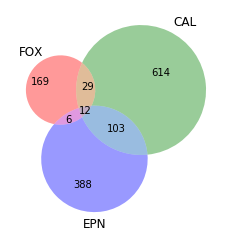

In [21]:
matplotlib_venn.venn3( venn.values(), set_labels=venn.keys())
plt.show()